In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('EV_Sales_states.csv')

In [4]:
df.head()

,Sl. No.,State/UT,Total Number Of Sales,No. of charging Stations
0,1,Jammu Kashmir,437,25
1,2,Himachal Pradesh,241,10
2,3,Punjab,764,0
3,4,Chandigarh,48,70
4,5,Uttarakhand,1057,10


In [6]:
df.describe()

,Sl. No.,Total Number Of Sales,No. of charging Stations
count,36.000000,36.000000,36.000000
mean,18.500000,2434.972222,79.916667
std,10.535654,4163.703396,102.743335
min,1.000000,0.000000,0.000000
25%,9.750000,42.750000,0.000000
50%,18.500000,767.500000,25.000000
75%,27.250000,2699.500000,148.750000
max,36.000000,19270.000000,317.000000


In [7]:
df.shape

(36, 4)

In [8]:
df.dtypes

Sl. No.                      int64
State/UT                    object
Total Number Of Sales        int64
No. of charging Stations     int64
dtype: object

In [9]:
df.isnull().sum()

Sl. No.                     0
State/UT                    0
Total Number Of Sales       0
No. of charging Stations    0
dtype: int64

In [10]:
df.corr()

,Sl. No.,Total Number Of Sales,No. of charging Stations
Sl. No.,1.00000,0.16051,0.23065
Total Number Of Sales,0.16051,1.00000,0.63003
No. of charging Stations,0.23065,0.63003,1.00000


<AxesSubplot:>

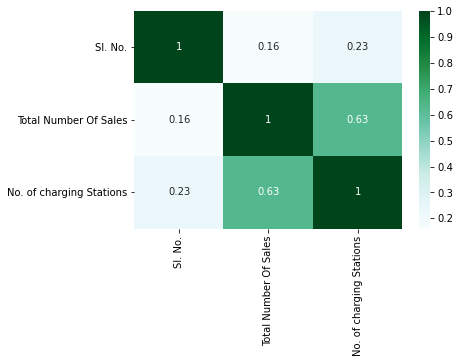

In [12]:
sns.heatmap(df.corr(),cmap='BuGn',annot=True)

In [13]:
from sklearn.cluster import KMeans

In [17]:
x = df.iloc[:,2:].values

In [18]:
x

array([[  437,    25],
       [  241,    10],
       [  764,     0],
       [   48,    70],
       [ 1057,    10],
       [ 1477,    50],
       [ 6413,    72],
       [ 6721,   205],
       [ 6022,   207],
       [ 2615,    37],
       [    0,    29],
       [    0,     0],
       [    0,     0],
       [   78,     0],
       [    0,     0],
       [  538,     0],
       [    6,    40],
       [  407,    20],
       [  771,   141],
       [  817,     0],
       [ 1671,    18],
       [ 2055,    25],
       [ 2953,   235],
       [ 1554,   278],
       [ 9393,   317],
       [ 3325,   266],
       [19270,   172],
       [  241,     0],
       [    4,     0],
       [ 2068,   211],
       [13515,   281],
       [  138,    10],
       [    2,    10],
       [ 3031,   138],
       [    0,     0],
       [   27,     0]], dtype=int64)

In [19]:
wcss = []
k= np.arange(1,10)
for i in k:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=45)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)




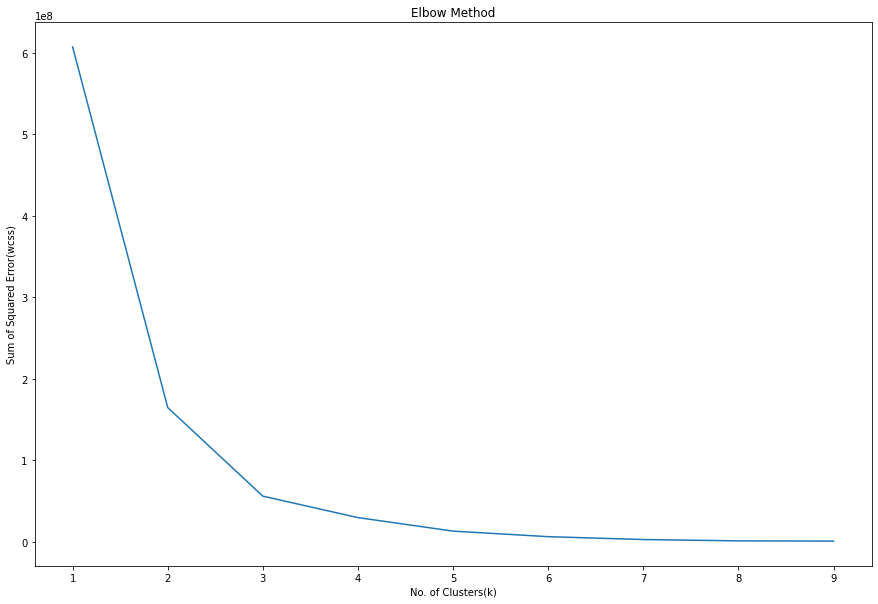

In [20]:
plt.figure(figsize=(15,10))
plt.plot(k,wcss)
plt.title("Elbow Method")
plt.xlabel("No. of Clusters(k)")
plt.ylabel("Sum of Squared Error(wcss)")
plt.show()


In [21]:
#No. of clusters = 3
kmeans = KMeans(n_clusters=3)
x_predict = kmeans.fit_predict(x)
x_predict



array([0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [22]:
df['cluster'] = x_predict
df

,Sl. No.,State/UT,Total Number Of Sales,No. of charging Stations,cluster
0,1,Jammu Kashmir,437,25,0
1,2,Himachal Pradesh,241,10,0
2,3,Punjab,764,0,0
3,4,Chandigarh,48,70,0
4,5,Uttarakhand,1057,10,0
5,6,Haryana,1477,50,0
6,7,Delhi,6413,72,2
7,8,Rajasthan,6721,205,2
8,9,Uttar Pradesh,6022,207,2
9,10,Bihar,2615,37,0


In [23]:
kmeans.cluster_centers_

array([[  877.5 ,    54.1 ],
       [16392.5 ,   226.5 ],
       [ 7137.25,   200.25]])

In [25]:
df.columns

Index(['Sl. No.', 'State/UT', 'Total Number Of Sales',
       'No. of charging Stations', 'cluster'],
      dtype='object')

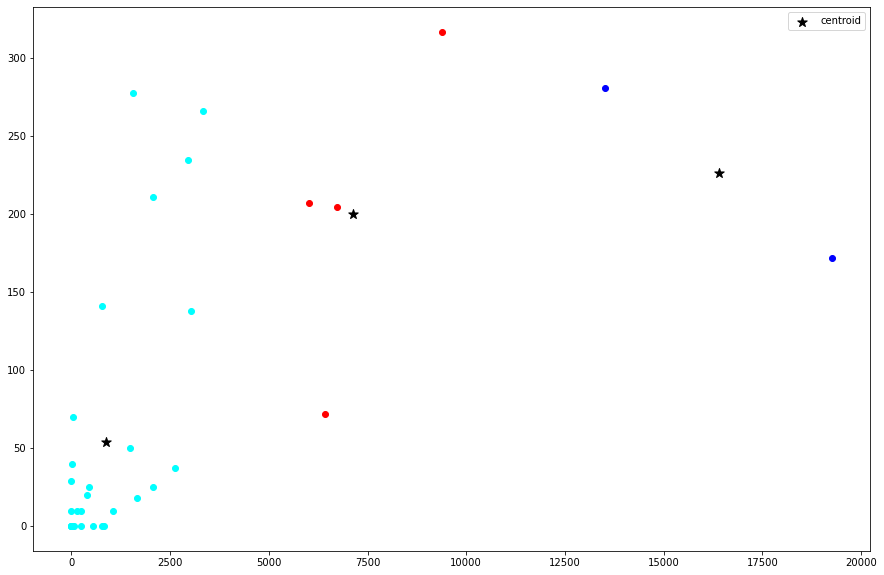

In [42]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]


plt.figure(figsize=(15,10))
plt.scatter(df1['Total Number Of Sales'],df1['No. of charging Stations'],color='cyan')
plt.scatter(df2['Total Number Of Sales'],df2['No. of charging Stations'],color='blue')
plt.scatter(df3['Total Number Of Sales'],df3['No. of charging Stations'],color='red')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, color = 'black',marker='*',label='centroid')
plt.legend()
plt.show()


